The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology<br>

Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

----------------

This notebook demonstrates loading a locally stored NASA/JPL UAVSAR Interferogram.

The interferogram may be downloaded at https://uavsar.asfdaac.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd

More Interferograms can be found at https://uavsar.jpl.nasa.gov/cgi-bin/data.pl

More information about UAVSAR can be found at https://uavsar.jpl.nasa.gov/education/what-is-uavsar.html

UAVSAR data courtesy NASA/JPL-Caltech

Initial imports

Package pyinsar needs to be installed

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
import numpy as np
from skimage.measure import block_reduce
from urllib.request import urlopen
from skdaccess.utilities.uavsar_util import readUAVSARMetadata
from skdaccess.utilities.file_browser import FileBrowser

Read metadata

In [2]:
url = 'https://uavsar.asfdaac.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.ann'

with urlopen(url) as url_file:
    meta = readUAVSARMetadata(url_file)

Metadata is a dictionary

In [3]:
meta['Site Description']

'San Andreas Fault - Salton Trough, CA'

Read in data

Information on the Interferogram format can be found at https://uavsar.jpl.nasa.gov/science/documents/rpi-format.html


https://uavsar.asfdaac.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd

In [4]:
f = FileBrowser()
f.widget()

In [5]:
rows = meta['grd.set_rows']
cols = meta['grd.set_cols']

interferogram = np.fromfile(f.path, dtype=np.dtype('<c8')).reshape(rows,cols)

Plot interferogram phase

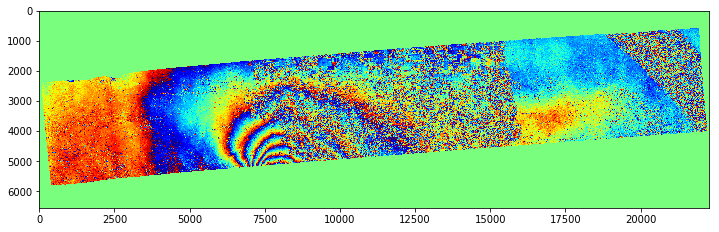

In [6]:
plt.imshow(np.arctan2(interferogram.imag, interferogram.real),cmap='jet');